In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns 
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("heart_disease_data.csv")
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


<Axes: xlabel='chol', ylabel='target'>

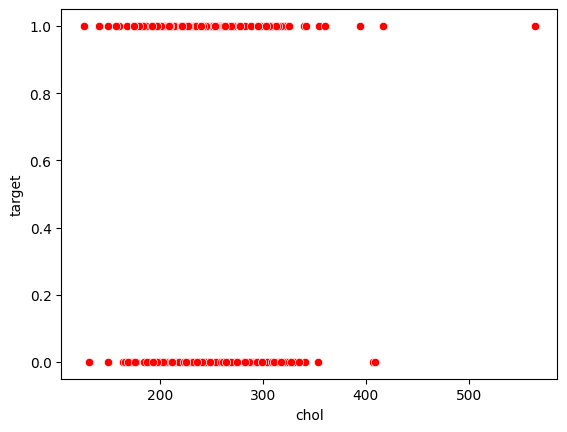

In [6]:
sns.scatterplot(x="chol",y="target",data=df,color='red')

(array([204.,   0.,   0., ...,   0.,   0.,  99.]),
 array([0.000e+00, 5.000e-04, 1.000e-03, ..., 9.990e-01, 9.995e-01,
        1.000e+00]),
 <BarContainer object of 2000 artists>)

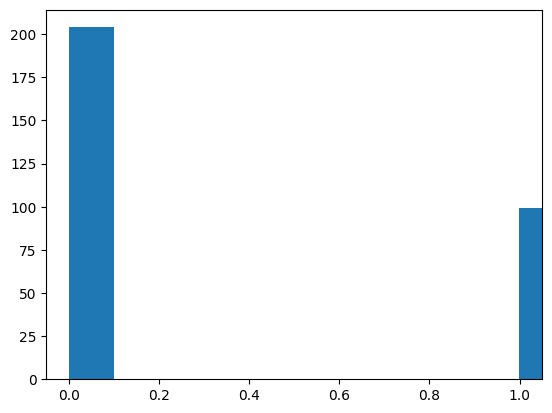

In [7]:
plt.hist(df.exang,bins=2000,width=0.1)

In [8]:
df.shape

(303, 14)

In [9]:
df.thalach.describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

In a normal distrubtion only values within 3rd percentile on both side are not outliers

In [10]:
upper = df.thalach.mean() + 3*df.thalach.std()

lower = df.thalach.mean() -3*df.thalach.std()

print(upper)

print(lower)

218.36234803121096
80.93138134172638


In [11]:
new_df= df[(df.cp<upper) & (df.cp>lower)]
new_df.shape

(0, 14)

Dropping exang as it is having values 0 and 1 which won;t be useful for fitting chol,fbs removed for lowest correlation witht target

In [40]:
X=df.drop(['target','exang','chol','fbs'],axis=1)
y=df['target']
print(X)
print(y)

     age  sex  cp  trestbps  restecg  thalach  oldpeak  slope  ca  thal
0     63    1   3       145        0      150      2.3      0   0     1
1     37    1   2       130        1      187      3.5      0   0     2
2     41    0   1       130        0      172      1.4      2   0     2
3     56    1   1       120        1      178      0.8      2   0     2
4     57    0   0       120        1      163      0.6      2   0     2
..   ...  ...  ..       ...      ...      ...      ...    ...  ..   ...
298   57    0   0       140        1      123      0.2      1   0     3
299   45    1   3       110        1      132      1.2      1   0     3
300   68    1   0       144        1      141      3.4      1   2     3
301   57    1   0       130        1      115      1.2      1   1     3
302   57    0   1       130        0      174      0.0      1   1     2

[303 rows x 10 columns]
0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [52]:
model = LogisticRegression(max_iter=1000,solver="newton-cholesky") 
mRandomForest=RandomForestClassifier(n_estimators=100)

In [53]:
model.fit(X_train,y_train)
mRandomForest.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
predictions=model.predict(X_test)
preRF=mRandomForest.predict(X_test)

In [55]:
print(df.thal.corr(df.target))

-0.34402926803831047


In [56]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


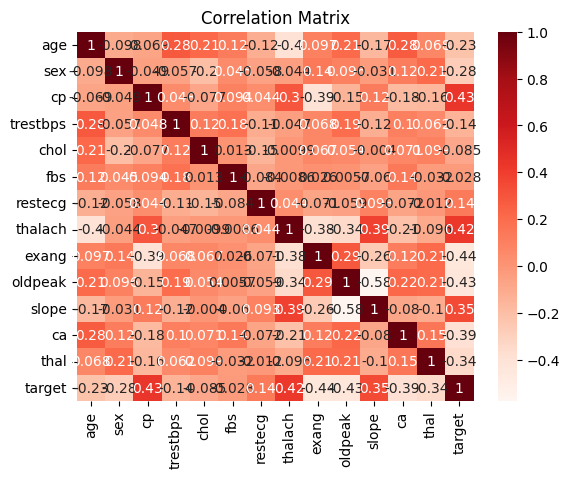

In [57]:
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

In [58]:
print('mean_squared_error:',mean_squared_error(y_test,predictions))
print('mean_absolute_error:',mean_absolute_error(y_test,predictions))

mean_squared_error: 0.12087912087912088
mean_absolute_error: 0.12087912087912088


In [59]:
print('mean_squared_error:',mean_squared_error(y_test,preRF))
print('mean_absolute_error:',mean_absolute_error(y_test,preRF))

mean_squared_error: 0.17582417582417584
mean_absolute_error: 0.17582417582417584


In [60]:
print("model score: %.3f" % model.score(X_test, y_test))

model score: 0.879


In [61]:
print("model score: %.3f" % mRandomForest.score(X_test, y_test))

model score: 0.824


Logistic Regression

In [62]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        44
           1       0.86      0.91      0.89        47

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



Random Forest

In [63]:
from sklearn.metrics import classification_report
y_pred=mRandomForest.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        44
           1       0.82      0.85      0.83        47

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



So the trained logistic regression model gives the maximum accuracy of 88%